## Throughout this document, I will construct a supervised learning convolutional neural network classifying MNIST fashion items as an practical example. Code snippets will be placed at relevant places in the notebook based on the material. 

## Additionally, I will modify a different pre-trained model in the last section to illustrate fine-tuning.

In [0]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import os
import zipfile

# tensorflow and keras
import tensorflow as tf
from tensorflow import keras

from keras import utils
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# 1. General concepts

## What is AI?

Artificial Intelligence is a field in computing pertaining to the pursuit of intelligent machines. There are often misconceptions about what is or is not AI, but it is important to note that AI broadly encompasses everything relating to machine intelligence.

## What is machine learning?

Machine learning is a modern application of AI, with the methodology of giving computers sufficient data to come up with their own algorithms and parameters to solve problems.

## What is deep learning?

Deep learning is a subset of machine learning using various layers to convert input information into data the computer can understand and model patterns with.

## Machine learning terminology


### Feature

A distinct measurement or description. Machine learning models use these to make inferences about the data.

### Label

A classification for a given input to a machine learning model. Models associate these with patterns in the data.

### Loss

Numerical difference between real data and model predicted data.

### Weights

Values representative of the importance of each feature to the model.

### Bias

Constant value influencing model along with weights.

### Training

Providing a model with a large quantity of input samples, in order for it to determine fitting values for the weights and bias to minimize loss.

### Testing

Plugging known test inputs into a previously constructed model in order to test its accuracy.

### Linear regression

Composing a linear relationship between features to make predictions about input data.

### Gradient descent

An optimization algorithm used to minimize loss in machine learning by moving in the steepest direction defined by the gradient. Used to alter weights of the model.

### Learning rate

Rate at which "jumps" in gradient descent are performed.

### Binary classification

Classifying an input as fitting or not fitting a single categorization.

### Multiclass classification

Classifying an input as one of numerous categories.

## Types of machine learning

There are numerous acknowledged paradigms of machine learning, although the lines dividing them can be blurred in cases.

### Supervised learning

The model is provided with labeled training data, allowing the model to determine a relationship between features and their respective labels.

### Unsupervised learning

The model is provided with unlabeled training data, and the model must decide how to distribute the data into distinct groups based on features.

## Code example: Pre-processing MNIST fashion data and classes



In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# 2. Building a model

## Structure of a convolutional neural network

Convolutional neural networks are composed of many convolutional and dense layers.

## Layers

The layers of a convnet alter the data in numerous ways. The end result of these layers is to allow the network to detect features and classify input based on those features.

### Standard convolutional layers

A convolutional layer applies a filter to an input, resulting in an activation. These make up the bulk of convnets. They use a variety of different activation functions to convolve the data.

### Pooling convolutional layers

The purpose of these layers is to decrease the spatial size of the convolved feature. They are also useful for extracting dominant features and reducing noise in input data.

### Dense layers

A dense layer does a matrix vector multiplication on the input, and outputs a vector. Useful to change the dimensions of the data.

## Activation functions

Choice of activation function is critical to a getting the desired results from a convnet. Each has its benefits and downsides.

### ReLU  (Rectified Linear Unit)

The ReLU function drops all numerical data that is less than zero, and leaves everything else unchanged. It is considered the standard activation function currently.

### Softmax

The Softmax function converts numerical inputs into a vector of probablities summing to 1.0. Most useful when dealing with more than two classes in multiclass classification.

### Sigmoid

The Sigmoid function is a monotonically increasing function that returns a value from 0 to 1. Generally inferior to Softmax, but often used when there are two classes in a multiclass classification problem.

## Code example: Building model with convolutional, pooling, and dense layers, and ReLU and softmax activation functions

In [0]:
# build model
model = models.Sequential()

# convolution layers
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(28, 28)))
model.add(layers.MaxPooling1D(2))

model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

model.add(layers.Conv1D(128, 3, activation='relu'))

# flattening + dense layers
model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
# summarize model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 26, 32)            2720      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 128)            24704     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

# 3. Compiling a model

## Optimizers

Optimizer functions, in conjunction with learning rate, help the model zero in on minimal loss values for each weight. Gradient descent is a popular example.

### SGD (Stochastic Gradient Descent)

A variant of gradient descent, with limited random selections. Noisier, but much less computationally demanding.

### Momentum

Similar to SGD, but takes previous gradients into account as well.

### RMSprop (Root Mean Square Propogation)

Essentially, RMSprop is gradient descent with momentum. It also varies learning rate for each individual weight.

## Loss functions

There are numerous different loss functions available. Optimal choice of loss function usually depends on the problem being solved, or what activation function is used in the output layer of the network.

### MSE (Mean Squared Error)

This function squares the differences between predicted and expected values. Most commonly used with linear regression.

### Cross-Entropy/Logarithmic

This function compares probabilites to actual class output values. Commonly used in classification problems.

## Code example: Compiling model with Cross-Entropy loss function and RMSprop optimizer

In [0]:
# compile model
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Training a model

## Model fit

Training a model is a very delicate process. An ideal model must learn the data well, but not too well.

### Underfitting model

An underfitting model has not recognized useful patterns in the data. Testing results are often inaccurate. This is usually a result of an overly simplistic model or not enough training data.



### Overfitting model

An overfitting model has recognized too many patterns in the data, past the bounds of what the model was supposed to accomplish. This is usually indicated by high training accuracy, but low validation accuracy. This is usually indicative of an overly complex model or excessive time training.

### Well-fitting model

This is considered a successful model. It has recognized only the desired patterns in the data, and has high training and testing accuracy relative to the task.

## Training terminology

### Epoch

Each epoch represents a single run of the dataset forward and backwards through the network.

### Batch

Since an entire dataset cannot be passed into a network all at once, we continually pass in subsets of the data or "batches". The batch size is the amount of data per batch.

### Iterations

The number of batches required to complete an epoch.

## Code example: Training model with MNIST fashion training data for 15 epochs

In [0]:
epochs = 15
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs,  
                    validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/15





60000/60000 [==============================] - 11s 188us/step - loss: 0.8634 - acc: 0.7019 - val_loss: 0.6413 - val_acc: 0.7488
Epoch 2/15
60000/60000 [==============================] - 11s 183us/step - loss: 0.5844 - acc: 0.7796 - val_loss: 0.5800 - val_acc: 0.7840
Epoch 3/15
60000/60000 [==============================] - 11s 180us/step - loss: 0.5343 - acc: 0.8031 - val_loss: 0.5345 - val_acc: 0.8030
Epoch 4/15
60000/60000 [==============================] - 11s 180us/step - loss: 0.4997 - acc: 0.8188 - val_loss: 0.5085 - val_acc: 0.8156
Epoch 5/15
60000/60000 [==============================] - 11s 183us/step - loss: 0.4738 - acc: 0.8299 - val_loss: 0.4926 - val_acc: 0.8213
Epoch 6/15
60000/60000 [==============================] - 11s 176us/step - loss: 0.4531 - acc: 0.8392 - val_loss: 0.4723 - val_acc: 0.8303
Epoch 7/15
600

In [0]:
# save model
model.save('mnist_fashion')

### We can see from the graphical representation below that this model is a reasonably good fit.

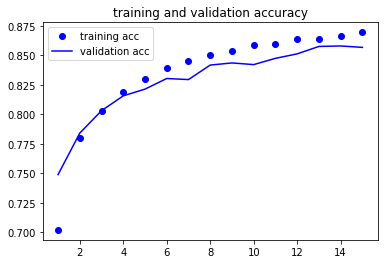

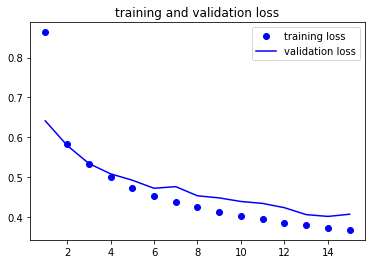

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

# 5. Finetuning  a pretrained model

## What is the purpose of fine-tuning a model?

Training a model from scratch can require a lot of resources, in terms of both computing power and datasets. We can allieviate these issues somewhat by using previously trained models as a base, and altering them to suit a new task.

## How does fine-tuning a model work?

Usually the early layers in a neural network learn more general features, and the later ones are more specific to the task. If we leave those beginning layers alone (called "freezing" layers) and retrain the later ones, we can effectively repurpose the model.

## Code example: Procedure of fine-tuning a model

### 1. Get dataset and process data

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-12-04 22:19:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  51.7MB/s    in 1.3s    

2019-12-04 22:19:15 (51.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# unzip data
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### 2. Load the pre-trained model

In [0]:
from keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))





58892288/58889256 [==============================] - 5s 0us/step








### 3. Freeze the convolution base

In [0]:
conv_base.trainable = False

### 4. Concatenate the model with our dense layers

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


### 5. Train the model with frozen convolutional base

In [0]:
# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
100/100 [==============================] - 21s 213ms/step - loss: 0.6091 - acc: 0.6520 - val_loss: 0.4454 - val_acc: 0.8180
Epoch 2/30
100/100 [==============================] - 17s 170ms/step - loss: 0.5062 - acc: 0.7545 - val_loss: 0.3743 - val_acc: 0.8480
Epoch 3/30
100/100 [==============================] - 17s 171ms/step - loss: 0.4410 - acc: 0.7975 - val_loss: 0.3391 - val_acc: 0.8590
Epoch 4/30
100/100 [==============================] - 17s 165ms/step - loss: 0.4050 - acc: 0.8140 - val_loss: 0.3195 - val_acc: 0.8600
Epoch 5/30
100/100 [==============================] - 17s 165ms/step - loss: 0.3866 - acc: 0.8365 - val_loss: 0.3103 - val_acc: 0.8660
Epoch 6/30
100/100 [==============================] - 17s 167ms/step - loss: 0.3804 - acc: 0.8270 - val_loss: 0.2935 - val_acc: 0.8720
Epoch 7/

### 6. Evaluate results of training

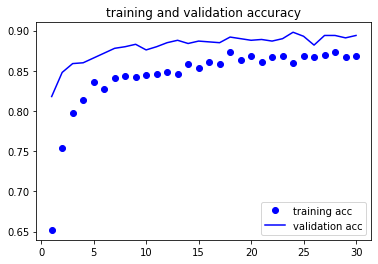

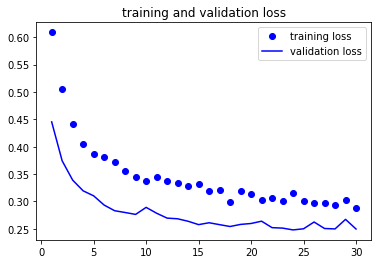

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

### 7. Fine-tune as desired

In [0]:
# unfreeze convolutional base
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [15]:
# compile model

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-6), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/50
 22/100 [=====>........................] - ETA: 13s - loss: 0.1105 - acc: 0.9500

KeyboardInterrupt: ignored

### We can now see the results of our fine-tuning:

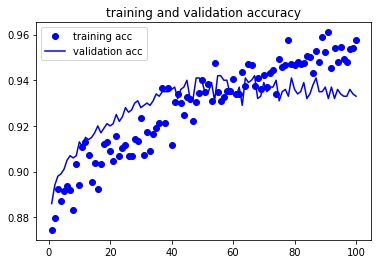

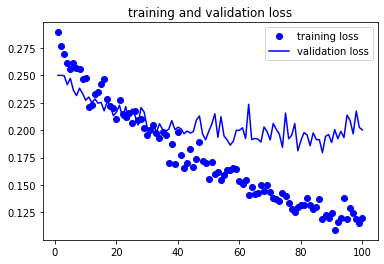

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()